In [19]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

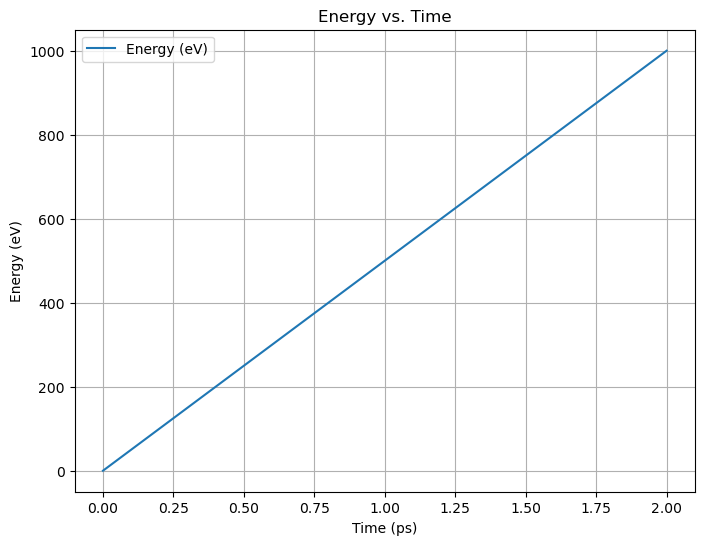

In [20]:
# Load energy data from the .ener file
energy_file = "/home/sa8200/comp-lab-class/comp-lab-class-2024/Week12-IntroAIMD/Runs/Water/water_aimd_1ns_every0.5fs-1.ener"  # Update with the actual file name
time = []
energy = []

with open(energy_file, "r") as f:
    for line in f:
        if line.startswith("#"):  # Skip header lines
            continue
        data = line.split()
        time.append(float(data[0]))    # Time (in fs)
        energy.append(float(data[1])) # Energy (in eV)

# Convert time to picoseconds (1 ps = 1000 fs)
time = np.array(time) / 1000
energy = np.array(energy)

# Plot energy vs. time
plt.figure(figsize=(8, 6))
plt.plot(time, energy, label="Energy (eV)")
plt.xlabel("Time (ps)")
plt.ylabel("Energy (eV)")
plt.title("Energy vs. Time")
plt.legend()
plt.grid()
plt.show()


In [3]:
pip install MDAnalysis 


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
traj = md.load("/home/sa8200/comp-lab-class/comp-lab-class-2024/Week12-IntroAIMD/Runs/Water/water.pdb", top="/home/sa8200/comp-lab-class/comp-lab-class-2024/Week12-IntroAIMD/Runs/Water/water.pdb")  # Adjust filenames as needed
box_size = 1.242 # Replace with your box size in nanometers


In [22]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import pandas as pd


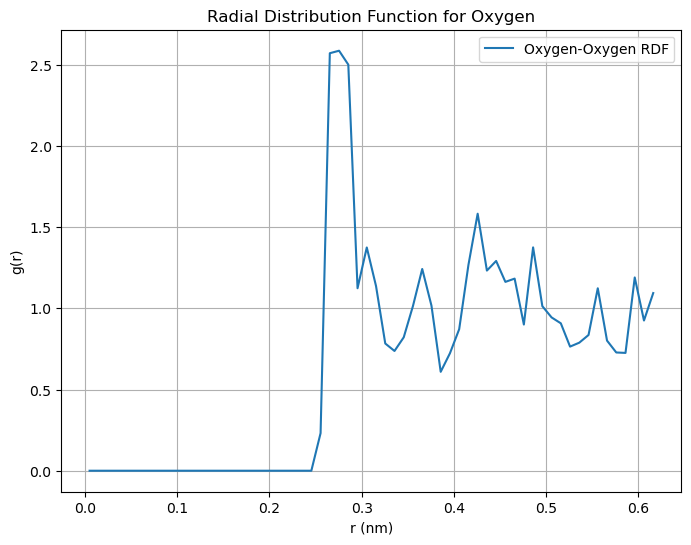

In [24]:
# Load the trajectory
traj = md.load("/home/sa8200/comp-lab-class/comp-lab-class-2024/Week12-IntroAIMD/Runs/Water/water.pdb", top="/home/sa8200/comp-lab-class/comp-lab-class-2024/Week12-IntroAIMD/Runs/Water/water.pdb")  # Update file paths

# Define cubic box manually
box_size = 1.242  # Replace with your actual box size in nm
unit_cell_vector = np.array([[box_size, 0, 0], [0, box_size, 0], [0, 0, box_size]])

# Set unit cell vectors for each frame
traj.unitcell_vectors = np.tile(unit_cell_vector, (traj.n_frames, 1, 1))

# Compute RDF
bin_width = 0.01  # Adjust bin width as needed
radii, gr = md.compute_rdf(traj, pairs=oxygen_pairs, bin_width=bin_width, r_range=(0.0, box_size / 2.0))

# Plot g(r)
plt.figure(figsize=(8, 6))
plt.plot(radii, gr, label="Oxygen-Oxygen RDF")
plt.xlabel("r (nm)")
plt.ylabel("g(r)")
plt.title("Radial Distribution Function for Oxygen")
plt.legend()
plt.grid()
plt.show()


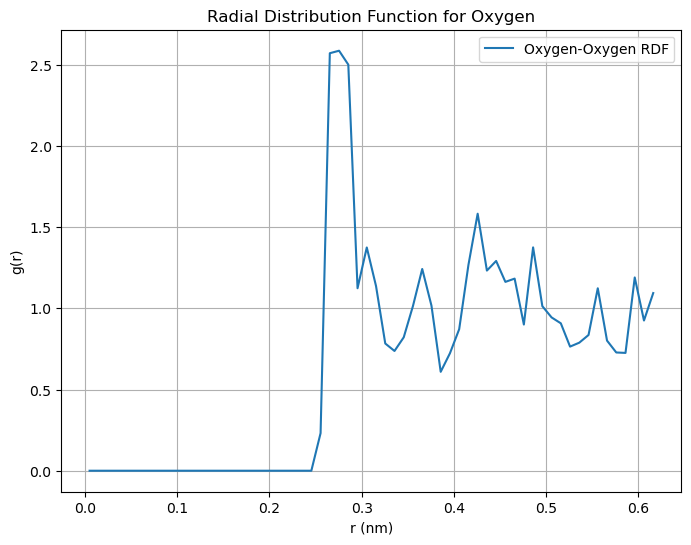

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
from itertools import combinations

# Load the trajectory
traj = md.load("/home/sa8200/comp-lab-class/comp-lab-class-2024/Week12-IntroAIMD/Runs/Water/water.pdb", top="/home/sa8200/comp-lab-class/comp-lab-class-2024/Week12-IntroAIMD/Runs/Water/water.pdb")  # Replace with actual path

# Define cubic box manually
box_size = 1.242  # Replace with your actual box size in nm
unit_cell_vector = np.array([[box_size, 0, 0], [0, box_size, 0], [0, 0, box_size]])

# Set unit cell vectors for each frame
traj.unitcell_vectors = np.tile(unit_cell_vector, (traj.n_frames, 1, 1))

# Get oxygen indices
oxygen_indices = [atom.index for atom in traj.topology.atoms if atom.element.symbol == "O"]

# Generate oxygen pairs
oxygen_pairs = list(combinations(oxygen_indices, 2))

# Compute RDF
bin_width = 0.01  # Adjust bin width as needed
radii, gr = md.compute_rdf(traj, pairs=oxygen_pairs, bin_width=bin_width, r_range=(0.0, box_size / 2.0))

# Plot g(r)
plt.figure(figsize=(8, 6))
plt.plot(radii, gr, label="Oxygen-Oxygen RDF")
plt.xlabel("r (nm)")
plt.ylabel("g(r)")
plt.title("Radial Distribution Function for Oxygen")
plt.legend()
plt.grid()
plt.show()
